In [1]:
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, Concatenate, Dropout, Conv2DTranspose

Using TensorFlow backend.


In [22]:
def get_unet(input_image, n_filter = 16, dropout = 0.1, kernel_size=3):
    # Contracting Path
    #c1 = conv2d_block(n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    c1 = Conv2D(n_filter*1, (kernel_size,kernel_size), padding='same')(input_image)
    c1 = BatchNormalization()(c1)
    c1 = Activation('relu')(c1)
    
    c1 = Conv2D(n_filter*1, (kernel_size,kernel_size), padding='same')(c1)
    c1 = BatchNormalization()(c1)
    c1 = Activation('relu')(c1)
    
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    
    #c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    c2 = Conv2D(n_filter*2, (kernel_size,kernel_size), padding='same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = Activation('relu')(c2)
    
    c2 = Conv2D(n_filter*2, (kernel_size,kernel_size), padding='same')(c2)
    c2 = BatchNormalization()(c2)
    c2 = Activation('relu')(c2)
    
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    
    #c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    c3 = Conv2D(n_filter*4, (kernel_size,kernel_size), padding='same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = Activation('relu')(c3)
    
    c3 = Conv2D(n_filter*4, (kernel_size,kernel_size), padding='same')(c3)
    c3 = BatchNormalization()(c3)
    c3 = Activation('relu')(c3)
    
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    
    #c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    c4 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same')(p3)
    c4 = BatchNormalization()(c4)
    c4 = Activation('relu')(c4)
    
    c4 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same')(c4)
    c4 = BatchNormalization()(c4)
    c4 = Activation('relu')(c4)
    
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    
    #code section of autoencoder
    #c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    c5 = Conv2D(n_filter*16, (kernel_size,kernel_size), padding='same')(p4)
    c5 = BatchNormalization()(c5)
    c5 = Activation('relu')(c5)
    
    c5 = Conv2D(n_filter*16, (kernel_size,kernel_size), padding='same')(c5)
    c5 = BatchNormalization()(c5)
    c5 = Activation('relu')(c5)
    
    
    # Expansive Path
    ## doubt: why is the stride (2,2) and (1,1)
    u6 = Conv2DTranspose(n_filter * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = Concatenate()([u6, c4])
    u6 = Dropout(dropout)(u6)
    ##c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    c6 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same')(u6)
    c6 = BatchNormalization()(c6)
    c6 = Activation('relu')(c6)
    
    c6 = Conv2D(n_filter*8, (kernel_size,kernel_size), padding='same')(c6)
    c6 = BatchNormalization()(c6)
    c6 = Activation('relu')(c6)
    
    
    u7 = Conv2DTranspose(n_filter * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = Concatenate()([u7, c3])
    u7 = Dropout(dropout)(u7)
    ##c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    c7 = Conv2D(n_filter*4, (kernel_size,kernel_size), padding='same')(u7)
    c7 = BatchNormalization()(c7)
    c7 = Activation('relu')(c7)
    
    c7 = Conv2D(n_filter*4, (kernel_size,kernel_size), padding='same')(c7)
    c7 = BatchNormalization()(c7)
    c7 = Activation('relu')(c7)
    
    
    u8 = Conv2DTranspose(n_filter * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = Concatenate()([u8, c2])
    u8 = Dropout(dropout)(u8)
    ##c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    c8 = Conv2D(n_filter*2, (kernel_size,kernel_size), padding='same')(u8)
    c8 = BatchNormalization()(c8)
    c8 = Activation('relu')(c8)
    
    c8 = Conv2D(n_filter*2, (kernel_size,kernel_size), padding='same')(c8)
    c8 = BatchNormalization()(c8)
    c8 = Activation('relu')(c8)
    
    
    u9 = Conv2DTranspose(n_filter * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = Concatenate()([u9, c1])
    u9 = Dropout(dropout)(u9)
    ##c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    c9 = Conv2D(n_filter*1, (kernel_size,kernel_size), padding='same')(u9)
    c9 = BatchNormalization()(c9)
    c9 = Activation('relu')(c9)
    
    c9 = Conv2D(n_filter*1, (kernel_size,kernel_size), padding='same')(c9)
    c9 = BatchNormalization()(c9)
    c9 = Activation('relu')(c9)
    
    
    # basically we want a sigmoid activation layer with depth of 1
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    
    model = Model(inputs=[input_image], outputs=[outputs])
    return model

In [34]:
input_image=Input((None,None,1))
model=get_unet(input_image=input_image)

In [35]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
def data_gen(image_dir, mask_dir, color_mode):
    data_gen_args = dict(rotation_range=90.,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         zoom_range=0.2,
                         rescale=1./255) 
    image_datagen = ImageDataGenerator(**data_gen_args) 
    mask_datagen = ImageDataGenerator(**data_gen_args)
    seed=1
    # Provide the same seed and keyword arguments to the fit and flow methods seed = 1 
    #image_datagen.fit(images, augment=True, seed=seed) 
    #mask_datagen.fit(masks, augment=True, seed=seed)

    image_generator = image_datagen.flow_from_directory(
        image_dir,
        color_mode=color_mode,
        class_mode=None,
        seed=seed)

    mask_generator = mask_datagen.flow_from_directory(
        mask_dir,
        color_mode=color_mode,
        class_mode=None,
        seed=seed)

    # combine generators into one which yields image and masks 
    train_generator = zip(image_generator, mask_generator)
    return train_generator

In [40]:
from keras.preprocessing.image import ImageDataGenerator
train_data1='C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\dataset1\\train_data'
train_annot1='C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\dataset1\\train_annot'
val_data1='C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\dataset1\\val_data'
val_annot1='C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\dataset1\\val_annot'
train_generator=data_gen(train_data1, train_annot1, 'grayscale')
val_generator=data_gen(val_data1, val_annot1, 'grayscale')

Found 367 images belonging to 1 classes.
Found 367 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 101 images belonging to 1 classes.


In [ ]:
history=model.fit_generator(generator=train_generator, steps_per_epoch=20, epochs=30, verbose=1, validation_data=val_generator, validation_steps=20)

Epoch 1/30


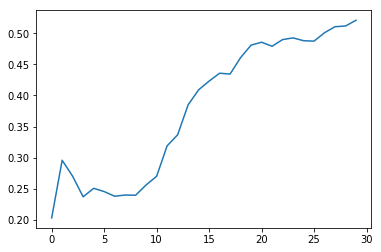

In [36]:
model.save('unet_model2')
plt.plot(history.history['acc'])

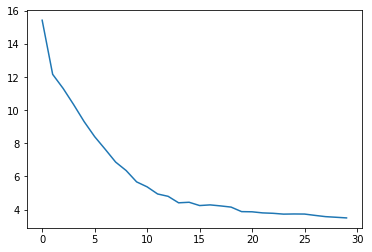

In [37]:
plt.plot(history.history['loss'])

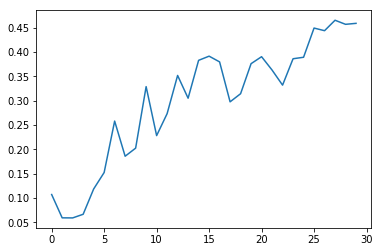

In [38]:
plt.plot(history.history['val_acc'])

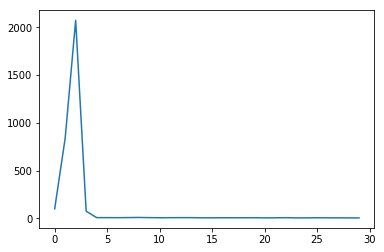

In [39]:
plt.plot(history.history['val_loss'])

In [40]:
from keras.preprocessing.image import load_img

In [41]:
img=load_img('C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\dataset1\\train_data')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\dataset1\\train_data'

In [42]:
pwd

'C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN'

In [43]:
cd dataset1

C:\Users\Ansh Singal\Desktop\study\py\NN\dataset1


In [48]:
pwd

'C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN\\dataset1'

In [49]:
cd train_data

C:\Users\Ansh Singal\Desktop\study\py\NN\dataset1\train_data


In [50]:
cd images_prepped_train

C:\Users\Ansh Singal\Desktop\study\py\NN\dataset1\train_data\images_prepped_train


In [51]:
img=load_img('0001TP_006690.png')

In [56]:
img.show()
img=np.asarray(img)

In [66]:
cd images_prepped_train

[WinError 2] The system cannot find the file specified: 'images_prepped_train'
C:\Users\Ansh Singal\Desktop\study\py\NN\dataset1\train_data\images_prepped_train


In [131]:
img=load_img("0001TP_006690.png")

In [132]:
img.show()

In [133]:
img=np.expand_dims(img, axis=3)
#img=np.expand_dims(img, axis=3)
img=np.asarray(img)
img.shape

(360, 480, 3, 1)

In [134]:
pred=model.predict(img)

AbortedError: Compute received an exception:Status: 3, message: could not initialize a memory descriptor, in file tensorflow/core/kernels/mkl_maxpooling_op.cc:578
	 [[Node: max_pooling2d_6/MaxPool = _MklMaxPool[T=DT_FLOAT, _kernel="MklOp", data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1], workspace_enabled=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](activation_22/Relu, activation_22/Relu:1)]]

In [106]:
a=*train_generator

SyntaxError: can't use starred expression here (<ipython-input-106-7671c772faa2>, line 4)

In [109]:
a,_=zip(*train_generator)

KeyboardInterrupt: 

In [110]:
img = load_img("../"+id_, grayscale=True)

NameError: name 'id_' is not defined